In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df=df.iloc[:,2:]

In [4]:
df.sample(5)

,Age,EstimatedSalary,Purchased
111,37,71000,0
240,42,149000,1
207,52,114000,0
26,49,28000,1
382,44,139000,1


## Train test split

In [5]:
from sklearn.model_selection import train_test_split
'''X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)
'''
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:2],
                                                    df.iloc[:,-1],
                                                    test_size=0.3,
                                                    random_state=0)

X_train


,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


This code is using the Python library called sklearn, which stands for Scikit-learn. Scikit-learn is a popular library used for machine learning tasks.

<h2>train_test_split</h2> is a function from Scikit-learn that helps split data into two parts: training data and testing data. The goal is to use the training data to train a machine learning model and then use the testing data to evaluate how well the model performs on new, unseen data.

The input to train_test_split is the DataFrame df, which contains the data we want to use for the machine learning task. The df has a column called 'Purchased', which represents whether a person purchased something or not. The goal is to predict this 'Purchased' column based on other features in the DataFrame.

<h2>df.drop('Purchased', axis=1)</h2>df.drop('Purchased', axis=1) is used to create a new DataFrame that excludes the 'Purchased' column. This new DataFrame, referred to as X, contains all the input features (or independent variables) that will be used to make predictions.

<h2>df['Purchased'] </h2>creates a separate Series called y, which contains the output or target variable we want to predict, in this case, whether a person purchased something or not.

test_size=0.3 means that the testing data will be 30% of the total data, and the remaining 70% will be used for training. This is a common split ratio, but you can adjust it as needed.

random_state=0 is a parameter used to control the random shuffling of the data before splitting. Setting this to a specific number ensures that every time you run this code with the same random_state value, you'll get the same split. This helps make the results reproducible.

Finally, the function returns four separate datasets: X_train, X_test, y_train, and y_test.

<h2>X_train and y_train</h2> are the training data. X_train contains the input features, and y_train contains the corresponding target values for training the model.
X_test and y_test are the testing data. X_test contains the input features, and y_test contains the corresponding target values for evaluating the model's performance.
In summary, this code takes a DataFrame with input features and a target variable ('Purchased'), splits the data into training and testing sets, and then stores them in separate variables for further use in building and evaluating a machine learning model.

In [6]:
y_train

92     0
223    1
234    0
232    1
377    0
      ..
323    1
192    0
117    0
47     0
172    0
Name: Purchased, Length: 280, dtype: int64

# StandardScaler
After Standandarization <h2>mean = 0 Standardaviation = 1</h2>

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)
#scaler.fit(X_test)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaler.fit(X_train): This line of code "fits" or "trains" the scaler on the training data X_train. During this step, the scaler learns the parameters it needs to perform the scaling. It calculates the mean and standard deviation of each feature in X_train.

scaler.transform(X_train): After the scaler is fitted, we use it to transform the training data X_train. Transformation here means applying the learned scaling parameters to each feature in X_train. The scaling process centers the data around 0 (mean) and scales it to have a standard deviation of 1.

scaler.transform(X_test): Similarly, we also transform the testing data X_test using the same scaling parameters that were learned from the training data. It's essential to use the same scaling parameters on the test set as we used on the training set to avoid introducing bias.

Now, we have two new sets of data: X_train_scaled and X_test_scaled. These contain the scaled versions of the original X_train and X_test, which are now ready to be used for training and testing machine learning models.

In summary, this code snippet uses the StandardScaler to scale the numerical features in the training and testing data, ensuring that they are in a consistent range and making the data more suitable for machine learning algorithms.

In [8]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [9]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [10]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [11]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [16]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [17]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# Effect of Scaling

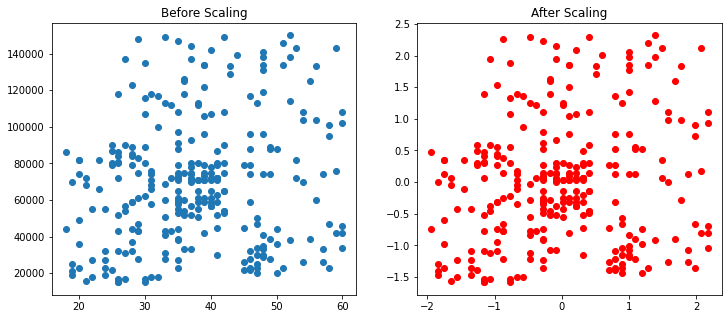

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

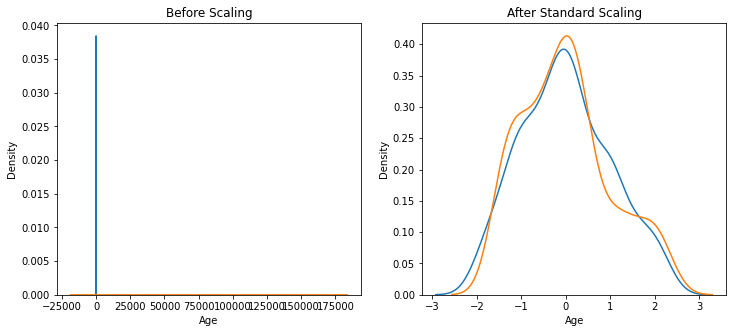

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Comparison of Distributions

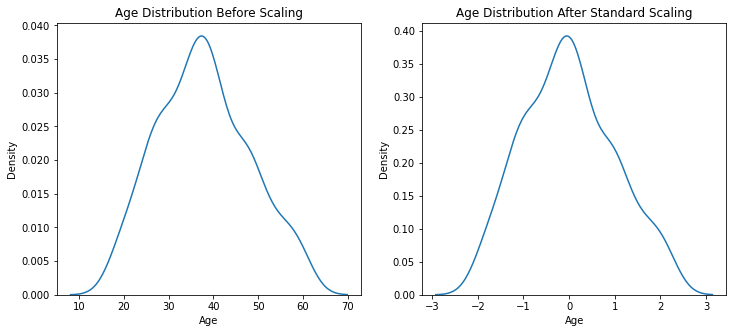

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

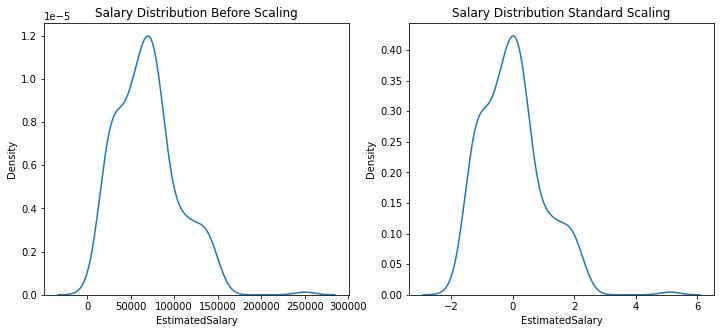

In [132]:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Why scaling is important?

In [152]:
#IN LogisticRegression we give scalled values to  LogisticRegression
from sklearn.linear_model import LogisticRegression

In [155]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [156]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [178]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [179]:
from sklearn.metrics import accuracy_score

In [180]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.6048387096774194
Scaled 0.7903225806451613


In [181]:
from sklearn.tree import DecisionTreeClassifier

In [182]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [183]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [184]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [185]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.8467741935483871
Scaled 0.8467741935483871


In [186]:
df.describe()

,Age,EstimatedSalary,Purchased
count,412.000000,412.000000,412.000000
mean,38.402913,73546.116505,0.366505
std,13.235203,47337.071674,0.482435
min,5.000000,1000.000000,0.000000
25%,29.000000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,95.000000,350000.000000,1.000000


# Effect of Outlier

In [187]:
df = df.append(pd.DataFrame(data={'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10020\2532947410.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data={'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)


In [188]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
410,90,250000,1
411,95,350000,1
412,5,1000,0
413,90,250000,1


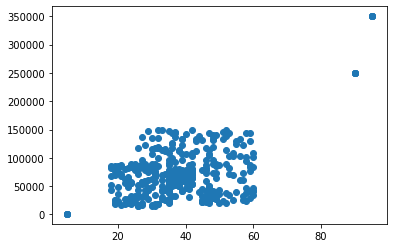

In [189]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [190]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((290, 2), (125, 2))

In [191]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [192]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

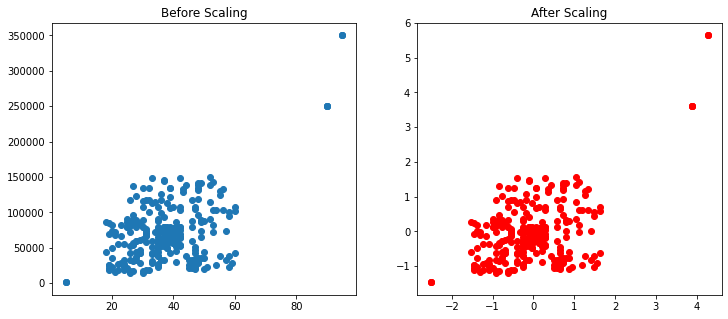

In [173]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

### Standardization in Machine Learning

#### What is Standardization?

Standardization, also known as Z-score normalization, is a preprocessing technique used in machine learning to rescale features to have a mean of 0 and a standard deviation of 1. This process transforms the data distribution to have a mean of 0 and a standard deviation of 1, which helps algorithms converge faster and prevents features with larger scales from dominating those with smaller scales during model training.

#### How Does Standardization Work?

The formula for standardization is:

\[ z = \frac{{x - \mu}}{{\sigma}} \]

Where:
- \( z \) is the standardized value,
- \( x \) is the original value of the feature,
- \( \mu \) is the mean of the feature,
- \( \sigma \) is the standard deviation of the feature.

#### Why Standardize Data?

Standardizing data is essential for many machine learning algorithms, especially those that are sensitive to the scale of features, such as gradient descent-based algorithms (e.g., linear regression, logistic regression, neural networks). Standardization ensures that each feature contributes equally to the model's learning process, regardless of its original scale.

#### Benefits of Standardization:

- **Improved Convergence**: Standardization helps gradient descent-based optimization algorithms converge faster by scaling features to have comparable ranges.
- **Equal Importance of Features**: Prevents features with larger scales from dominating those with smaller scales during model training.
- **Enhanced Interpretability**: Standardization makes the coefficients or weights of features more interpretable, as they are on the same scale.

#### When to Standardize Data?

Standardization should be applied before training the machine learning model, typically during the preprocessing stage. It is particularly important when features have different scales or units of measurement, as it ensures fair treatment of each feature during model training.

#### How to Standardize Data?

Standardization can be easily implemented using libraries such as scikit-learn in Python:

```python
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)
